In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Read Data

In [5]:
data = pd.read_csv('./healthcare-dataset-stroke-data.csv')

In [6]:
data # 5110x12

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
data.isnull().sum() #There are 201 nulls in bmi

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# EDA

## 重要變數分布情形

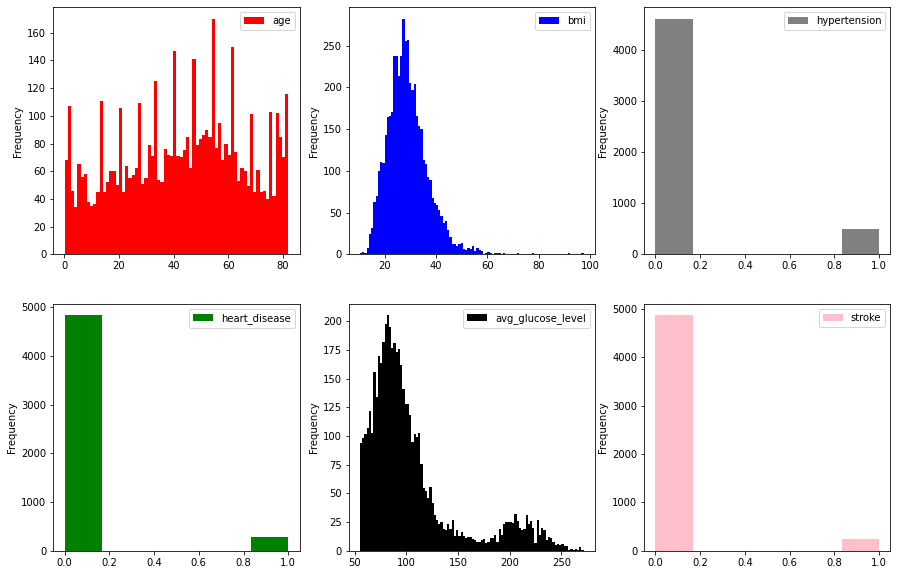

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10))
data.plot(kind = "hist", y = "age", bins = 70, color = "red", ax = axes[0][0])
data.plot(kind = "hist", y = "bmi", bins = 100, color = "blue", ax = axes[0][1])
data.plot(kind = 'hist', y = 'hypertension', bins = 6, color = 'grey', ax = axes[0][2])
data.plot(kind = "hist", y = "heart_disease", bins = 6, color="green", ax = axes[1][0])
data.plot(kind = "hist", y = "avg_glucose_level", bins = 100, color = "black", ax = axes[1][1])
data.plot(kind = 'hist', y = 'stroke', bins = 6, color = 'pink', ax = axes[1][2])
plt.show()
#整體分布bmi, age算合理，avg_glucose_level呈現雙峰，其餘變數非常不平衡
#依變數Stroke不平衡，分析前需做處理

## 其他變數的分布圖

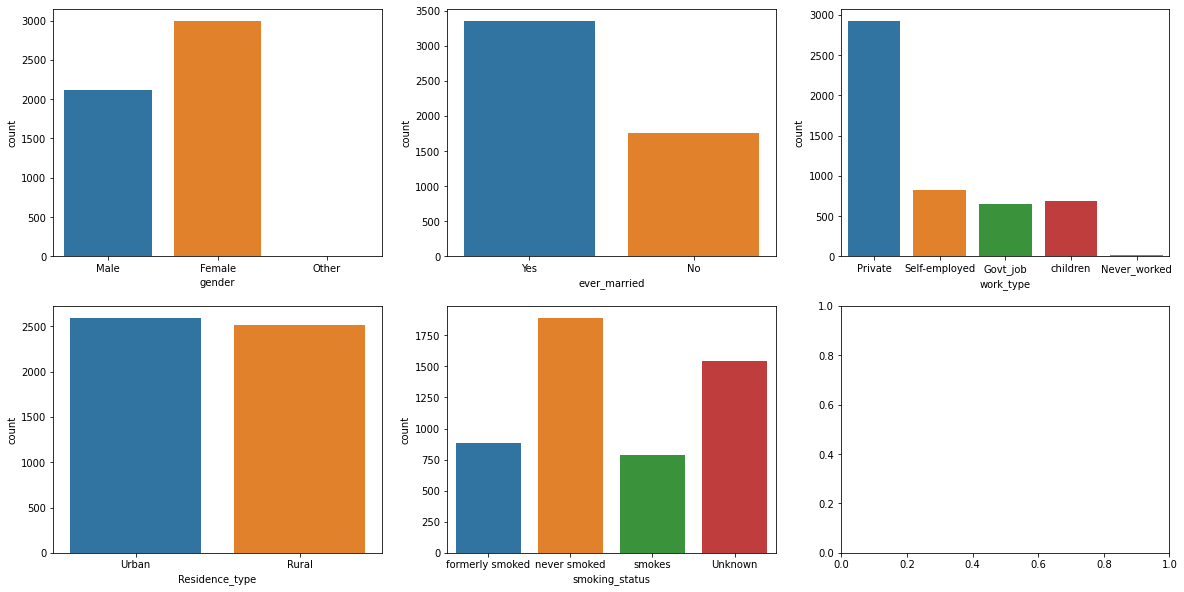

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))
sns.countplot(data = data, x = 'gender', ax = axes[0][0])
sns.countplot(data = data, x = 'ever_married', ax = axes[0][1])
sns.countplot(data = data, x = 'work_type', ax = axes[0][2])
sns.countplot(data = data, x = 'Residence_type', ax = axes[1][0])
sns.countplot(data = data, x = 'smoking_status', ax = axes[1][1])
plt.show()

## Scatterplots

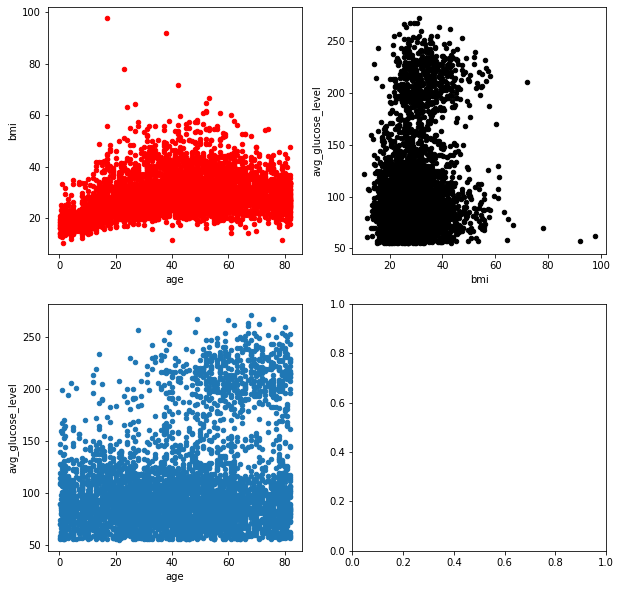

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2,figsize = (10,10))
data.plot(kind = 'scatter', x = 'age', y = 'bmi',color = 'red', ax = axes[0][0])
data.plot(kind = 'scatter', x = 'bmi', y = 'avg_glucose_level', color = 'black', ax = axes[0][1])
data.plot(kind = 'scatter', x = 'age', y = 'avg_glucose_level', ax = axes[1][0])
plt.show()
#看起來都沒什麼關連

查看相關矩陣圖

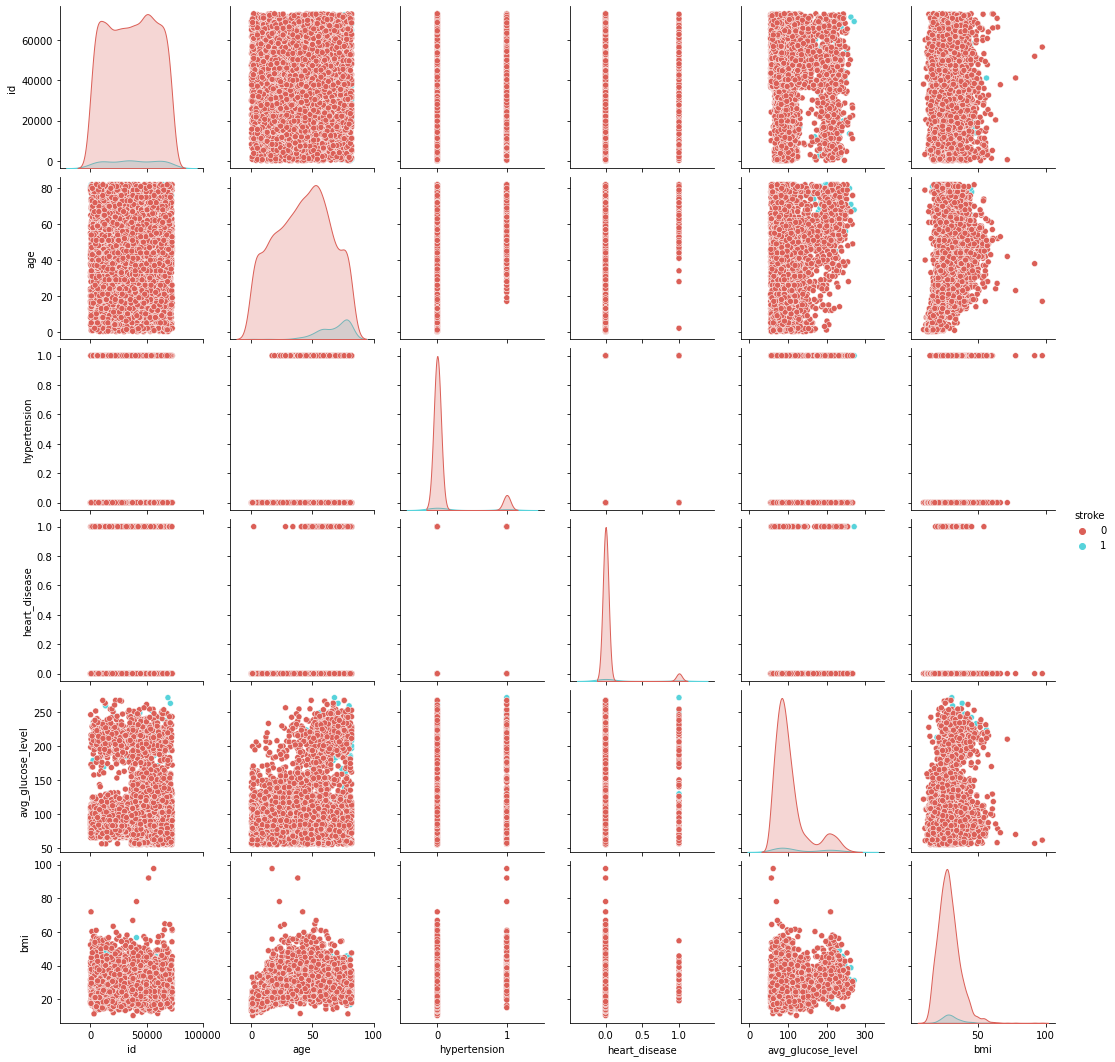

In [ ]:
sns.pairplot(data, hue = 'stroke',palette = 'hls') #所有變數的散佈圖(依據stroke分類)

In [ ]:
data.corr() #相關係數矩陣

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


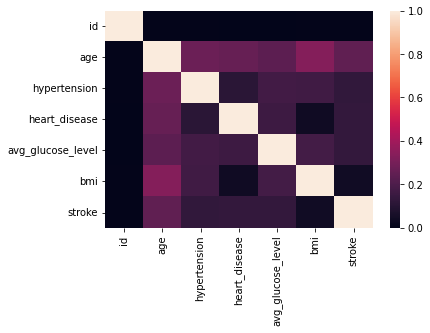

In [ ]:
sns.heatmap(data.corr()) #整體相關性不高

# Analytics

In [9]:
#One hot encoding
mice_data = pd.get_dummies(data)

In [11]:
index = list(mice_data.columns)

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke',
 'gender_Female',
 'gender_Male',
 'gender_Other',
 'ever_married_No',
 'ever_married_Yes',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Rural',
 'Residence_type_Urban',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

In [12]:
from fancyimpute import IterativeImputer
mice_imputer = IterativeImputer()
mice_data = mice_imputer.fit_transform(mice_data)

print(mice_data)

[[9.0460e+03 6.7000e+01 0.0000e+00 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 [5.1676e+04 6.1000e+01 0.0000e+00 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [3.1112e+04 8.0000e+01 0.0000e+00 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 ...
 [1.9723e+04 3.5000e+01 0.0000e+00 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [3.7544e+04 5.1000e+01 0.0000e+00 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 [4.4679e+04 4.4000e+01 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]]


In [13]:
mice_data = pd.DataFrame(mice_data, columns = index) 

In [14]:
data['bmi'] = mice_data['bmi']

In [15]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.127421,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [16]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [17]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.940564,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.731134,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.700000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.300000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.900000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Categorical variables vs. stroke

In [ ]:
categ = data[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']]

In [ ]:
pd.crosstab(categ['gender'],categ['stroke']) #列連表

stroke,0,1
gender,,
Female,2853,141
Male,2007,108
Other,1,0


In [ ]:
for x in categ.columns[:-1]:
  print(pd.crosstab(categ[x],categ['stroke']),end = '\n\n')

stroke     0    1
gender           
Female  2853  141
Male    2007  108
Other      1    0

stroke           0    1
hypertension           
0             4429  183
1              432   66

stroke            0    1
heart_disease           
0              4632  202
1               229   47

stroke           0    1
ever_married           
No            1728   29
Yes           3133  220

stroke            0    1
work_type               
Govt_job        624   33
Never_worked     22    0
Private        2776  149
Self-employed   754   65
children        685    2

stroke             0    1
Residence_type           
Rural           2400  114
Urban           2461  135

stroke              0   1
smoking_status           
Unknown          1497  47
formerly smoked   815  70
never smoked     1802  90
smokes            747  42



In [ ]:
cross = pd.concat([pd.crosstab(categ[x], categ['stroke']) for x in categ.columns[:-1]], keys = categ.columns[:-1])
cross

stroke                             0    1
gender         Female           2853  141
               Male             2007  108
               Other               1    0
hypertension   0                4429  183
               1                 432   66
heart_disease  0                4632  202
               1                 229   47
ever_married   No               1728   29
               Yes              3133  220
work_type      Govt_job          624   33
               Never_worked       22    0
               Private          2776  149
               Self-employed     754   65
               children          685    2
Residence_type Rural            2400  114
               Urban            2461  135
smoking_status Unknown          1497   47
               formerly smoked   815   70
               never smoked     1802   90
               smokes            747   42

In [ ]:
cross.loc['gender']

stroke,0,1
Female,2853,141
Male,2007,108
Other,1,0


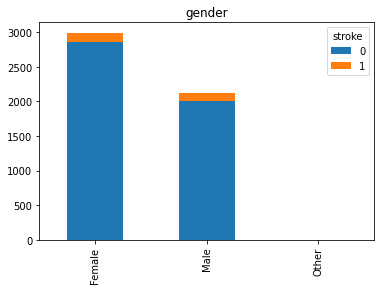

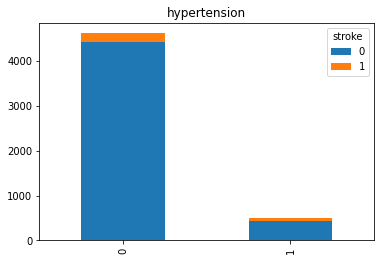

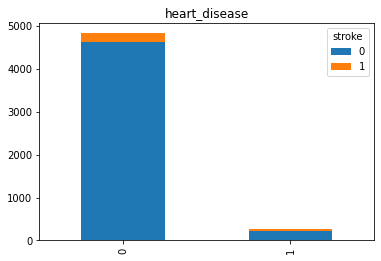

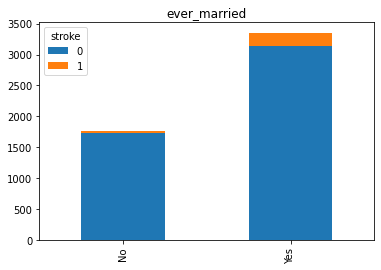

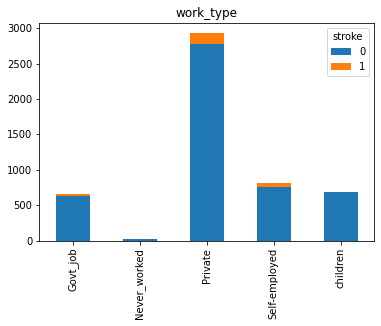

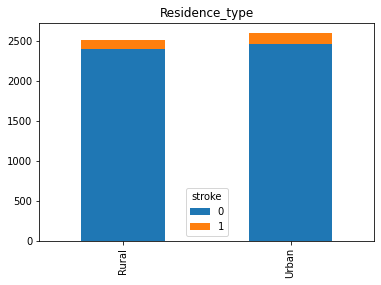

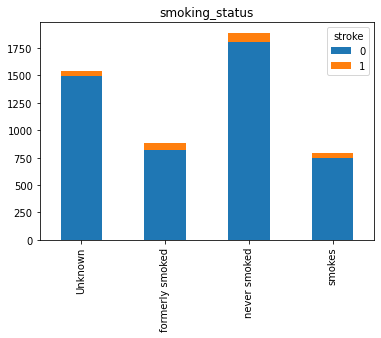

In [ ]:
for i in categ.columns[:-1]:
  cross.loc[i].plot(kind = 'bar',stacked = True)
  plt.title(i)

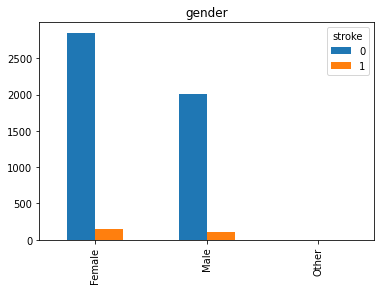

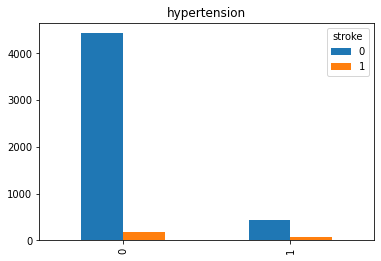

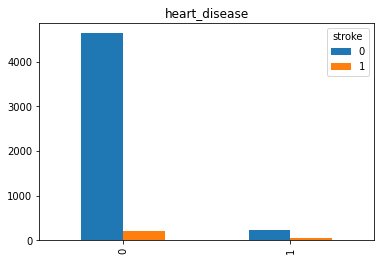

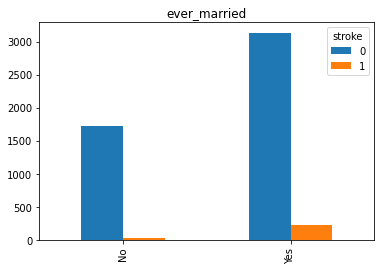

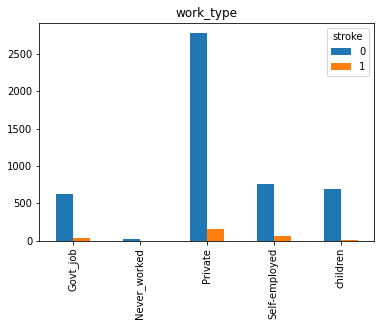

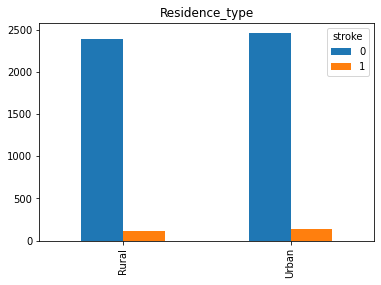

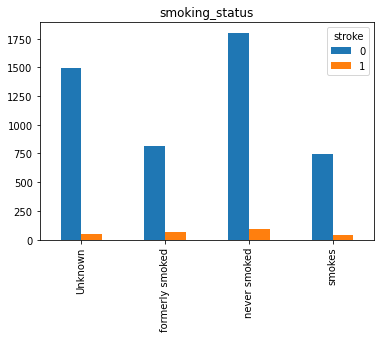

In [ ]:
for i in categ.columns[:-1]:
  cross.loc[i].plot(kind = 'bar')
  plt.title(i)

## Modeling

### 1.一律one-hot encoding
### 2.ID捨棄
### 3.標準化
### 模型分為統計模型&機器學習/深度學習

In [18]:
dataset = pd.get_dummies(data)

In [19]:
index = list(dataset.columns)

In [20]:
index

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke',
 'gender_Female',
 'gender_Male',
 'gender_Other',
 'ever_married_No',
 'ever_married_Yes',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Rural',
 'Residence_type_Urban',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

In [21]:
dataset = dataset[index[1:]]
dataset

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,31.127421,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,32.320744,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.000000,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.600000,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [22]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit_transform(dataset[['age','avg_glucose_level','bmi']])
scale = pd.DataFrame(scale,columns = ['age','avg_glucose_level','bmi'])
dataset[['age','avg_glucose_level','bmi']] = scale[['age','avg_glucose_level','bmi']]

In [23]:
dataset #要拿來實際跑模型的資料

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,0,1,2.706375,0.990823,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,0.786070,0,0,2.121559,0.282891,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,1.626390,0,1,-0.005028,0.460448,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,0.255342,0,0,1.437358,0.706231,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1.582163,1,0,1.501184,-0.639110,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.626390,1,0,-0.494658,0.437259,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5106,1.670617,0,0,0.420775,1.430646,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,-0.363842,0,0,-0.511443,0.214664,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,0.343796,0,0,1.328257,-0.432135,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [24]:
X = dataset.drop('stroke', axis = 1).values
y = dataset['stroke'].values

In [25]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2)

In [26]:
print(x_train.shape)
print(y_train.shape)

(4088, 21)
(4088,)


## 資料不平衡，出來的模型難以成功預測stroke，以smote處理訓練集

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
sm = SMOTE(random_state=2)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train.ravel())

In [29]:
print(sum(y_train_sm == 1))
print(sum(y_train_sm == 0))

3895
3895


## 1. 統計模型：Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lgst = LogisticRegression()
lgst.fit(x_train_sm,y_train_sm)

LogisticRegression()

In [32]:
train_score = lgst.score(x_train_sm, y_train_sm)
score = lgst.score(x_test, y_test)
print('訓練集預測率:',train_score)
print('測試集預測率',score)

訓練集預測率: 0.7883183568677792
測試集預測率 0.7592954990215264


[[731 235]
 [ 11  45]]


Text(0.5, 1.0, 'Accuracy Score: 0.7592954990215264')

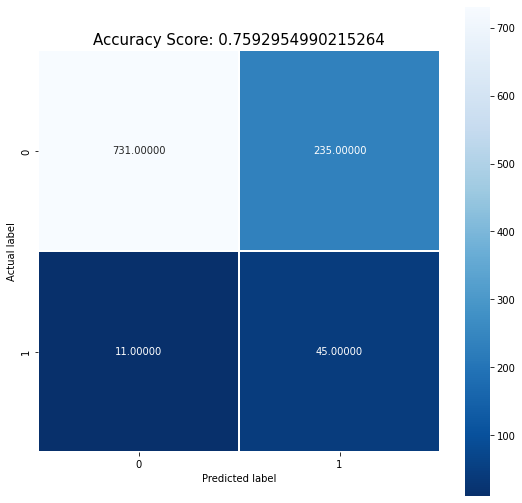

In [37]:
#模型評估：confusion matrix
from sklearn import metrics
y_pred = lgst.predict(x_test)

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".5f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
# 模型完全偵測不到中風患者

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [39]:
accuracies = cross_val_score(estimator = lgst, X = x_train_sm, y = y_train_sm, cv = 10)
roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)  #F1 Score

In [40]:
print('accuracies mean:',accuracies.mean())
print('ROC:',roc)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracies mean: 0.7863928112965342
ROC: 0.7801501035196687
precision 0.16071428571428573
recall 0.8035714285714286
f1 0.26785714285714285


## 2. 機器學習模型：

## KNN

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier()
knn.fit(x_train_sm,y_train_sm)

KNeighborsClassifier()

In [44]:
y_pred = knn.predict(x_test)
cm3 = confusion_matrix(y_test.reshape(1022,1), y_pred)
cm3

array([[817, 149],
       [ 32,  24]])

Text(0.5, 1.0, 'Accuracy Score: 0.7592954990215264')

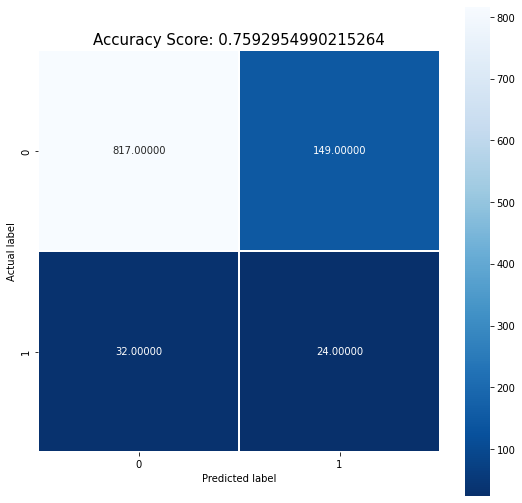

In [45]:
plt.figure(figsize=(9,9))
sns.heatmap(cm3, annot=True, fmt=".5f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [46]:
accuracies = cross_val_score(estimator = knn, X = x_train_sm, y = y_train_sm, cv = 10)
roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)  #F1 Score

In [47]:
print('accuracies mean:',accuracies.mean())
print('ROC:',roc)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracies mean: 0.9183568677792042
ROC: 0.6371635610766044
precision 0.13872832369942195
recall 0.42857142857142855
f1 0.2096069868995633


## SVM

In [48]:
from sklearn.svm import SVC

In [49]:
svc = SVC()
svc.fit(x_train_sm,y_train_sm)

SVC()

In [50]:
y_pred = svc.predict(x_test)
cm4 = confusion_matrix(y_test.reshape(1022,1), y_pred)
cm4

array([[806, 160],
       [ 29,  27]])

Text(0.5, 1.0, 'Accuracy Score: 0.7592954990215264')

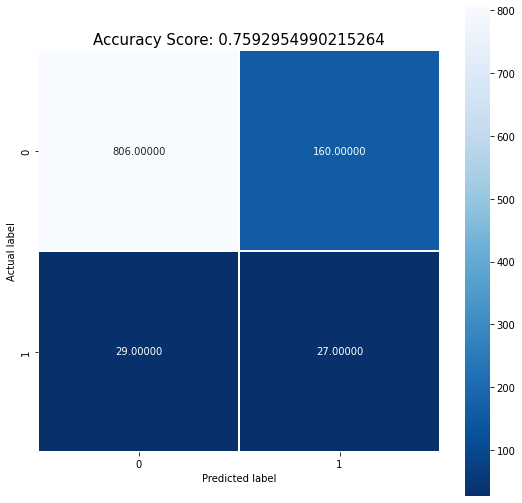

In [51]:
plt.figure(figsize=(9,9))
sns.heatmap(cm4, annot=True, fmt=".5f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [52]:
accuracies = cross_val_score(estimator = svc, X = x_train_sm, y = y_train_sm, cv = 10)
roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)  #F1 Score

In [53]:
print('accuracies mean:',accuracies.mean())
print('ROC:',roc)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracies mean: 0.887548138639281
ROC: 0.6582556935817806
precision 0.1443850267379679
recall 0.48214285714285715
f1 0.22222222222222224


## Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
tree = DecisionTreeClassifier()
tree.fit(x_train_sm,y_train_sm)

DecisionTreeClassifier()

In [56]:
y_pred = tree.predict(x_test)
cm5 = confusion_matrix(y_test.reshape(1022,1), y_pred)
cm5

array([[885,  81],
       [ 46,  10]])

Text(0.5, 1.0, 'Accuracy Score: 0.7592954990215264')

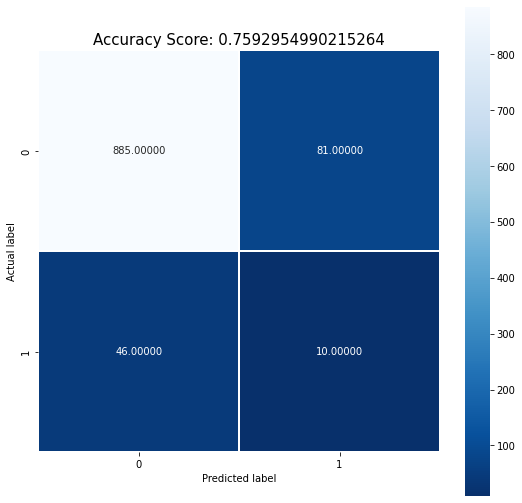

In [57]:
plt.figure(figsize=(9,9))
sns.heatmap(cm5, annot=True, fmt=".5f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [58]:
accuracies = cross_val_score(estimator = tree, X = x_train_sm, y = y_train_sm, cv = 10)
roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)  #F1 Score

In [59]:
print('accuracies mean:',accuracies.mean())
print('ROC:',roc)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracies mean: 0.9245186136071887
ROC: 0.547360248447205
precision 0.10989010989010989
recall 0.17857142857142858
f1 0.1360544217687075


## Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
RF = RandomForestClassifier()
RF.fit(x_train_sm, y_train_sm)

RandomForestClassifier()

In [62]:
y_pred = RF.predict(x_test)
cm6 = confusion_matrix(y_test.reshape(1022,1), y_pred)
cm6

array([[936,  30],
       [ 48,   8]])

Text(0.5, 1.0, 'Accuracy Score: 0.7592954990215264')

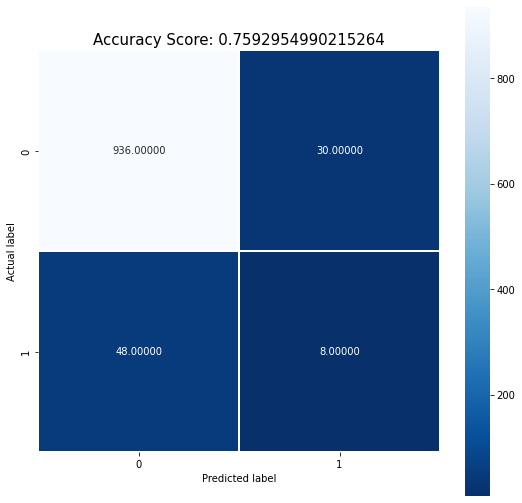

In [63]:
plt.figure(figsize=(9,9))
sns.heatmap(cm6, annot=True, fmt=".5f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [64]:
accuracies = cross_val_score(estimator = RF, X = x_train_sm, y = y_train_sm, cv = 10)
roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)  #F1 Score

In [65]:
print('accuracies mean:',accuracies.mean())
print('ROC:',roc)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracies mean: 0.9676508344030808
ROC: 0.5559006211180124
precision 0.21052631578947367
recall 0.14285714285714285
f1 0.1702127659574468


## 3.深度學習模型(DNN)：

In [67]:
from keras import Sequential
from keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import SGD

In [ ]:
x_train

array([[-0.01002256,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.71484481,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78607007,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.09566165,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-1.07147941,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.56493323,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
model = Sequential([
    # input layer
    BatchNormalization(input_shape=(21,)),
    # hidden layer 1
    Dense(units=256, activation='relu'),
    BatchNormalization(),
    # Dropout(rate=0.4),
    # hidden layer 2
    Dense(units=128, activation='relu'),
    BatchNormalization(),
    # Dropout(rate=0.4),
    # hidden layer 3
    Dense(units=64, activation='relu'),
    BatchNormalization(),
    # Dropout(rate=0.4),
    # hidden layer 4
    Dense(units=32, activation='relu'),
    BatchNormalization(),
    Dense(units=16, activation='relu'),
    BatchNormalization(),
    # Dropout(rate=0.4),
    Dense(units=1, activation='sigmoid')
])

model.compile(
    optimizer=SGD(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    x_train, y_train,
    batch_size=256,
    epochs=500,
    validation_split=0.2
)

Epoch 1/500
13/13 [==============================] - 4s 36ms/step - loss: 0.8426 - accuracy: 0.5703 - val_loss: 0.6657 - val_accuracy: 0.9181
Epoch 2/500
13/13 [==============================] - 0s 12ms/step - loss: 0.8347 - accuracy: 0.5761 - val_loss: 0.6449 - val_accuracy: 0.9499
Epoch 3/500
13/13 [==============================] - 0s 12ms/step - loss: 0.8282 - accuracy: 0.5728 - val_loss: 0.6190 - val_accuracy: 0.9474
Epoch 4/500
13/13 [==============================] - 0s 12ms/step - loss: 0.8193 - accuracy: 0.5786 - val_loss: 0.5919 - val_accuracy: 0.9474
Epoch 5/500
13/13 [==============================] - 0s 11ms/step - loss: 0.8130 - accuracy: 0.5807 - val_loss: 0.5660 - val_accuracy: 0.9474
Epoch 6/500
13/13 [==============================] - 0s 11ms/step - loss: 0.8016 - accuracy: 0.5780 - val_loss: 0.5411 - val_accuracy: 0.9487
Epoch 7/500
13/13 [==============================] - 0s 10ms/step - loss: 0.8008 - accuracy: 0.5792 - val_loss: 0.5189 - val_accuracy: 0.9487
Epoch 

In [ ]:
score, acc = model.evaluate(x_test, y_test)
print('score:',score)
print('accuracy:',acc)

32/32 [==============================] - 0s 4ms/step - loss: 0.2422 - accuracy: 0.9462
score: 0.24215945601463318
accuracy: 0.946183979511261


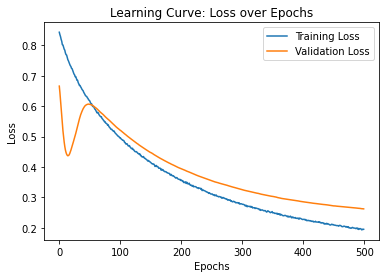

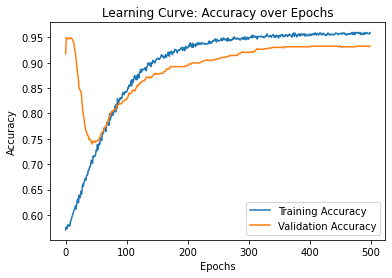

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Learning Curve: Loss over Epochs")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Training Loss', 'Validation Loss'])

### Accuracy Graph
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Learning Curve: Accuracy over Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Training Accuracy', 'Validation Accuracy'])

In [ ]:
y_pred = model.predict(x_test) 

In [ ]:
y_pred = (y_pred > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.reshape(1022,1),y_pred)

In [ ]:
cm

array([[961,  11],
       [ 44,   6]])

Text(0.5, 1.0, 'Accuracy Score: 0.24215945601463318')

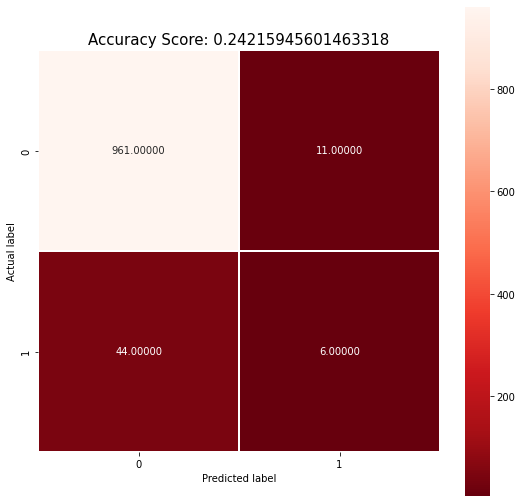

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".5f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

## DNN with SMOTE data

In [ ]:
model2 = Sequential([
    # input layer
    BatchNormalization(input_shape=(21,)),
    # hidden layer 1
    Dense(units=256, activation='relu'),
    BatchNormalization(),
    # Dropout(rate=0.4),
    # hidden layer 2
    Dense(units=128, activation='relu'),
    BatchNormalization(),
    # Dropout(rate=0.4),
    # hidden layer 3
    Dense(units=64, activation='relu'),
    BatchNormalization(),
    # Dropout(rate=0.4),
    # hidden layer 4
    Dense(units=32, activation='relu'),
    BatchNormalization(),
    Dense(units=16, activation='relu'),
    BatchNormalization(),
    # Dropout(rate=0.4),
    Dense(units=1, activation='sigmoid')
])

model2.compile(
    optimizer=SGD(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history2 = model2.fit(
    x_train_sm, y_train_sm,
    batch_size=256,
    epochs=500,
    validation_split=0.2
)

In [ ]:
score, acc = model2.evaluate(x_test, y_test)
print('score:',score)
print('accuracy:',acc)

32/32 [==============================] - 0s 4ms/step - loss: 0.2903 - accuracy: 0.8816
score: 0.29029321670532227
accuracy: 0.8816046714782715


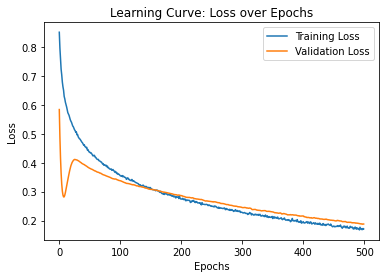

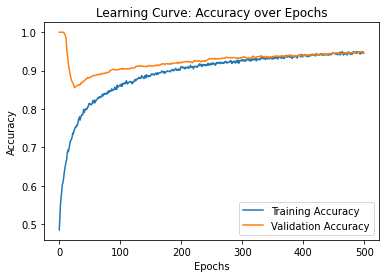

In [ ]:
history_df = pd.DataFrame(history2.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Learning Curve: Loss over Epochs")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Training Loss', 'Validation Loss'])

### Accuracy Graph
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Learning Curve: Accuracy over Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Training Accuracy', 'Validation Accuracy'])

In [ ]:
y_pred = model2.predict(x_test) 

In [ ]:
y_pred = (y_pred > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test.reshape(1022,1),y_pred)

In [ ]:
cm2

array([[888,  84],
       [ 37,  13]])

Text(0.5, 1.0, 'Accuracy Score: 0.29029321670532227')

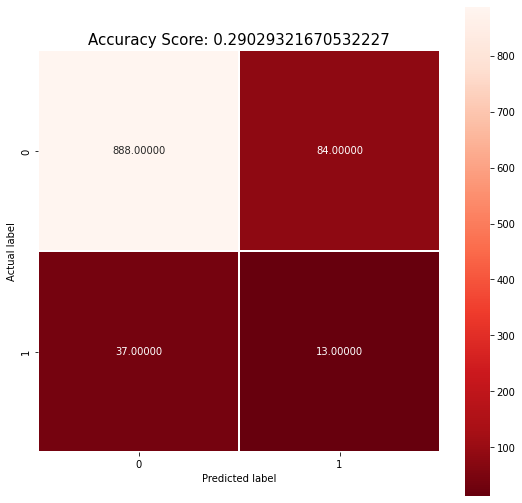

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm2, annot=True, fmt=".5f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [ ]:
model3 = Sequential([
    # input layer
    BatchNormalization(input_shape=(21,)),
    # hidden layer 1
    Dense(units=21, activation='tanh'),
    BatchNormalization(),
    # Dropout(rate=0.4),
    # hidden layer 2
    Dense(units=21, activation='tanh'),
    BatchNormalization(),
    # Dropout(rate=0.4),
    # hidden layer 3
    Dense(units=21, activation='tanh'),
    BatchNormalization(),
    # Dropout(rate=0.4),
    # hidden layer 4
    Dense(units=21, activation='tanh'),
    BatchNormalization(),
    Dense(units=21, activation='tanh'),
    BatchNormalization(),
    # Dropout(rate=0.4),
    Dense(units=1, activation='sigmoid')
])

model3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history3 = model3.fit(
    x_train_sm, y_train_sm,
    batch_size=256,
    epochs=500,
    validation_split=0.2
)

In [ ]:
score, acc = model3.evaluate(x_test, y_test)
print('score:',score)
print('accuracy:',acc)

32/32 [==============================] - 0s 4ms/step - loss: 0.5183 - accuracy: 0.8855
score: 0.5183066725730896
accuracy: 0.8855186104774475


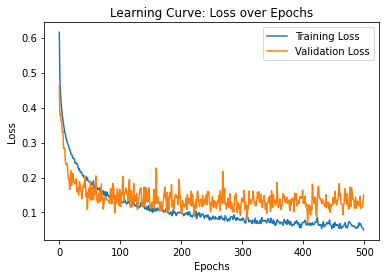

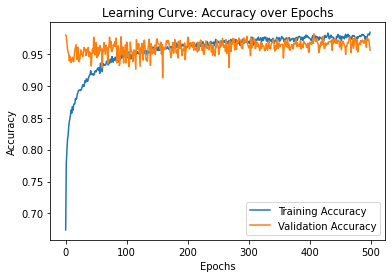

In [ ]:
history_df = pd.DataFrame(history3.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Learning Curve: Loss over Epochs")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Training Loss', 'Validation Loss'])

### Accuracy Graph
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Learning Curve: Accuracy over Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Training Accuracy', 'Validation Accuracy'])

In [ ]:
y_pred = model3.predict(x_test) 

In [ ]:
y_pred = (y_pred > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test.reshape(1022,1),y_pred)

In [ ]:
cm3

array([[896,  76],
       [ 41,   9]])

Text(0.5, 1.0, 'Accuracy Score: 0.5183066725730896')

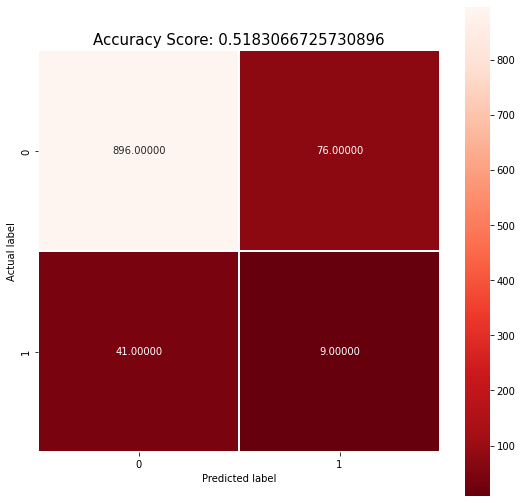

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm3, annot=True, fmt=".5f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [ ]:
model4 = Sequential([
    # input layer
    BatchNormalization(input_shape=(21,)),
    # hidden layer 1
    Dense(units=21, activation='tanh'),
    BatchNormalization(),
    # Dropout(rate=0.4),
    # hidden layer 2
    Dense(units=21, activation='tanh'),
    BatchNormalization(),
    # Dropout(rate=0.4),
    # hidden layer 3
    Dense(units=21, activation='tanh'),
    BatchNormalization(),
    # Dropout(rate=0.4),
    # hidden layer 4
    Dense(units=21, activation='tanh'),
    BatchNormalization(),
    Dense(units=21, activation='tanh'),
    BatchNormalization(),
    # Dropout(rate=0.4),
    Dense(units=1, activation='sigmoid')
])

model4.compile(
    optimizer=SGD(lr = 0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history4 = model4.fit(
    x_train_sm, y_train_sm,
    batch_size=256,
    epochs=500,
    validation_split=0.2
)

In [69]:
score, acc = model4.evaluate(x_test, y_test)
print('score:',score)
print('accuracy:',acc)

32/32 [==============================] - 0s 4ms/step - loss: 0.3516 - accuracy: 0.8249
score: 0.3516199290752411
accuracy: 0.824853241443634


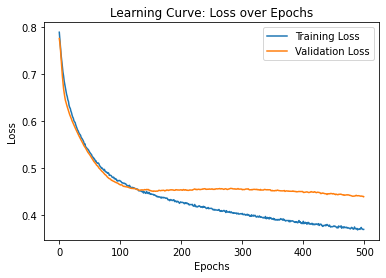

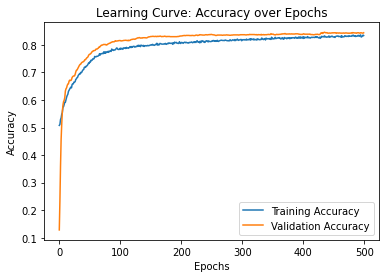

In [70]:
history_df = pd.DataFrame(history4.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Learning Curve: Loss over Epochs")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Training Loss', 'Validation Loss'])

### Accuracy Graph
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Learning Curve: Accuracy over Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Training Accuracy', 'Validation Accuracy'])

In [71]:
y_pred = model4.predict(x_test) 

In [72]:
y_pred = (y_pred > 0.5).astype("int32")

In [73]:
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test.reshape(1022,1),y_pred)

In [74]:
cm4

array([[810, 156],
       [ 23,  33]])

Text(0.5, 1.0, 'Accuracy Score: 0.3516199290752411')

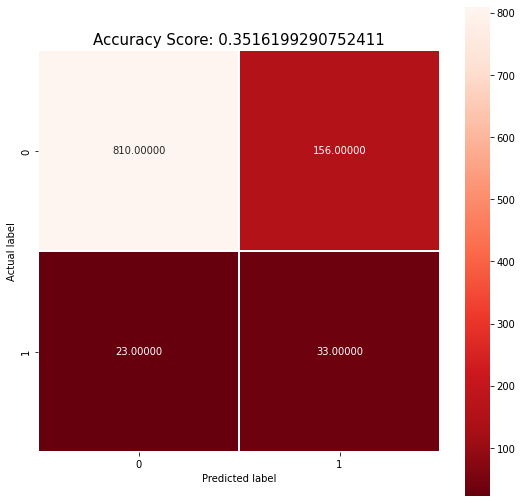

In [75]:
plt.figure(figsize=(9,9))
sns.heatmap(cm4, annot=True, fmt=".5f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [77]:
# accuracies = cross_val_score(estimator = model4, X = x_train_sm, y = y_train_sm, cv = 10)
roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)  #F1 Score

In [78]:
print('accuracies mean:',accuracies.mean())
print('ROC:',roc)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracies mean: 0.9676508344030808
ROC: 0.7138975155279504
precision 0.1746031746031746
recall 0.5892857142857143
f1 0.2693877551020408


In [ ]:
from keras.layers import Dropout

In [ ]:
model5 = Sequential([
    # input layer
    BatchNormalization(input_shape=(21,)),
    # hidden layer 1
    Dense(units=256, activation='relu'),
    BatchNormalization(),
    Dropout(rate=0.4),
    # hidden layer 2
    Dense(units=128, activation='relu'),
    BatchNormalization(),
    Dropout(rate=0.4),
    # hidden layer 3
    Dense(units=64, activation='relu'),
    BatchNormalization(),
    Dropout(rate=0.4),
    # hidden layer 4
    Dense(units=32, activation='relu'),
    BatchNormalization(),
    Dense(units=16, activation='relu'),
    BatchNormalization(),
    Dropout(rate=0.4),
    Dense(units=1, activation='sigmoid')
])

model5.compile(
    optimizer=SGD(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history5 = model5.fit(
    x_train, y_train,
    batch_size=256,
    epochs=500,
    validation_split=0.2
)

In [ ]:
score, acc = model5.evaluate(x_test, y_test)
print('score:',score)
print('accuracy:',acc)

32/32 [==============================] - 0s 3ms/step - loss: 0.2455 - accuracy: 0.9491
score: 0.24553793668746948
accuracy: 0.9491193890571594


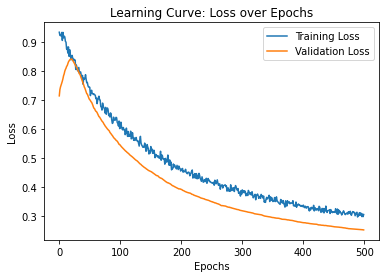

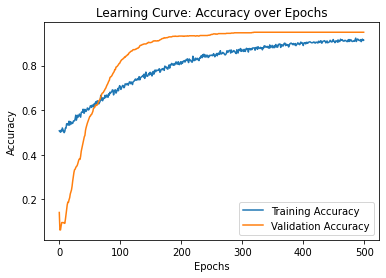

In [ ]:
history_df = pd.DataFrame(history5.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Learning Curve: Loss over Epochs")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Training Loss', 'Validation Loss'])

### Accuracy Graph
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Learning Curve: Accuracy over Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Training Accuracy', 'Validation Accuracy'])

In [ ]:
y_pred = model5.predict(x_test) 

In [ ]:
y_pred = (y_pred > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test.reshape(1022,1),y_pred)

In [ ]:
cm5

array([[970,   2],
       [ 50,   0]])

Text(0.5, 1.0, 'Accuracy Score: 0.24553793668746948')

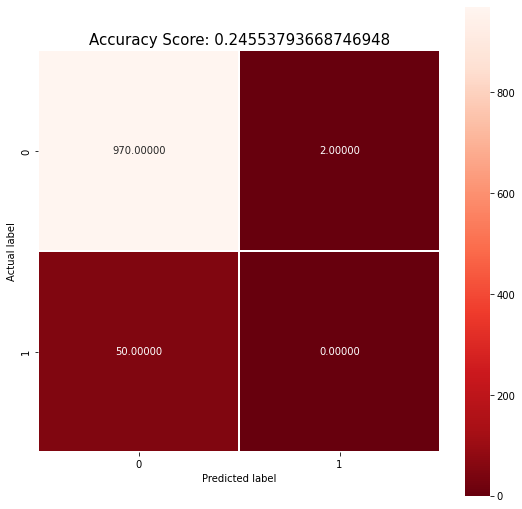

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm5, annot=True, fmt=".5f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)